In [45]:
# importing Qiskit
from qiskit import Aer, execute
from qiskit import QuantumCircuit

#importing the Oracle circuit builder
from qiskit.circuit.library import PhaseOracle

# import basic plot tools
from qiskit.visualization import plot_histogram


In [46]:
def initialize_s(qc, n):
    for q in list(range(n)):
        qc.h(q)
def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1
# Multicontrolled z-gate subroutine that applies the gate to the circuit based on the control and target qubits
def multicontrolled_z(qc, control, target):
    qc.h(target)
    qc.mct(control, target)
    qc.h(target)

# Actual diffuser function that applies the diffuser to the circuit
def diffuser(qc):
    for qubit in range(4):
        qc.h(qubit)
        qc.x(qubit)

    multicontrolled_z(qc, list(range(4)), 4)

    for qubit in range(4):
        qc.x(qubit)
        qc.h(qubit)
sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw()

┌───┐               ░  ░ ┌───────────────┐ ░ ┌───┐┌───┐»
    v_0: ─────────────┤ H ├───────────────░──░─┤0              ├─░─┤ H ├┤ X ├»
                      ├───┤               ░  ░ │               │ ░ ├───┤├───┤»
    v_1: ─────────────┤ H ├───────────────░──░─┤1              ├─░─┤ H ├┤ X ├»
                      ├───┤               ░  ░ │  Phase Oracle │ ░ ├───┤├───┤»
    v_2: ─────────────┤ H ├───────────────░──░─┤2              ├─░─┤ H ├┤ X ├»
                      ├───┤               ░  ░ │               │ ░ ├───┤├───┤»
    v_3: ─────────────┤ H ├───────────────░────┤3              ├─░─┤ H ├┤ X ├»
                      └───┘               ░    └───────────────┘ ░ ├───┤└───┘»
    c_0: ─────────────────────────────────░──────────────────────░─┤ H ├─────»
                                          ░                      ░ └───┘     »
    c_1: ─────────────────────────────────░──────────────────────░───────────»
                                          ░                      ░           »
    c_2: ─────────────────────────────────░──────────────────────░───────────»
                                          ░                      ░           »
    c_3: ─────────────────────────────────░──────────────────────░───────────»
         ┌──────────────────────────────┐ ░                      ░           »
  out_0: ┤ Initialize(0.70711,-0.70711) ├─░──────────────────────░───────────»
         └──────────────────────────────┘ ░                      ░           »
cbits: 4/════════════════════════════════════════════════════════════════════»
                                                                             »
«              ┌───┐┌───┐ ░ ┌───────────────┐ ░ ┌───┐┌───┐     ┌───┐┌───┐ ░ »
«    v_0: ──■──┤ X ├┤ H ├─░─┤0              ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░─»
«           │  ├───┤├───┤ ░ │               │ ░ ├───┤├───┤  │  ├───┤├───┤ ░ »
«    v_1: ──■──┤ X ├┤ H ├─░─┤1              ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░─»
«           │  ├───┤├───┤ ░ │  Phase Oracle │ ░ ├───┤├───┤  │  ├───┤├───┤ ░ »
«    v_2: ──■──┤ X ├┤ H ├─░─┤2              ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─░─»
«           │  ├───┤├───┤ ░ │               │ ░ ├───┤├───┤  │  ├───┤├───┤ ░ »
«    v_3: ──■──┤ X ├┤ H ├───┤3              ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├───»
«         ┌─┴─┐├───┤└───┘   └───────────────┘ ░ ├───┤└───┘┌─┴─┐├───┤└───┘   »
«    c_0: ┤ X ├┤ H ├──────────────────────────░─┤ H ├─────┤ X ├┤ H ├────────»
«         └───┘└───┘                          ░ └───┘     └───┘└───┘        »
«    c_1: ────────────────────────────────────░─────────────────────────────»
«                                             ░                             »
«    c_2: ────────────────────────────────────░─────────────────────────────»
«                                             ░                             »
«    c_3: ────────────────────────────────────░─────────────────────────────»
«                                             ░                             »
«  out_0: ────────────────────────────────────░─────────────────────────────»
«                                             ░                             »
«cbits: 4/══════════════════════════════════════════════════════════════════»
«                                                                           »
«         ┌───────────────┐ ░ ┌───┐┌───┐     ┌───┐┌───┐┌─┐                   »
«    v_0: ┤0              ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├┤M├───────────■───────»
«         │               │ ░ ├───┤├───┤  │  ├───┤├───┤└╥┘┌─┐        │       »
«    v_1: ┤1              ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫─┤M├────────┼────■──»
«         │  Phase Oracle │ ░ ├───┤├───┤  │  ├───┤├───┤ ║ └╥┘┌─┐     │    │  »
«    v_2: ┤2              ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫─┤M├─────┼────┼──»
«         │               │ ░ ├───┤├───┤  │  ├───┤├───┤ ║  ║ └╥┘┌─┐  │    │  »
«    v_3: ┤3              ├─░─┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫──╫─┤M├──┼────┼──»
«         └───────────────┘ ░ ├───┤└───┘┌─┴─┐├───┤└───┘ ║  ║  ║ └╥┘┌─┴─┐┌─┴─┐»
«    c_0: ────

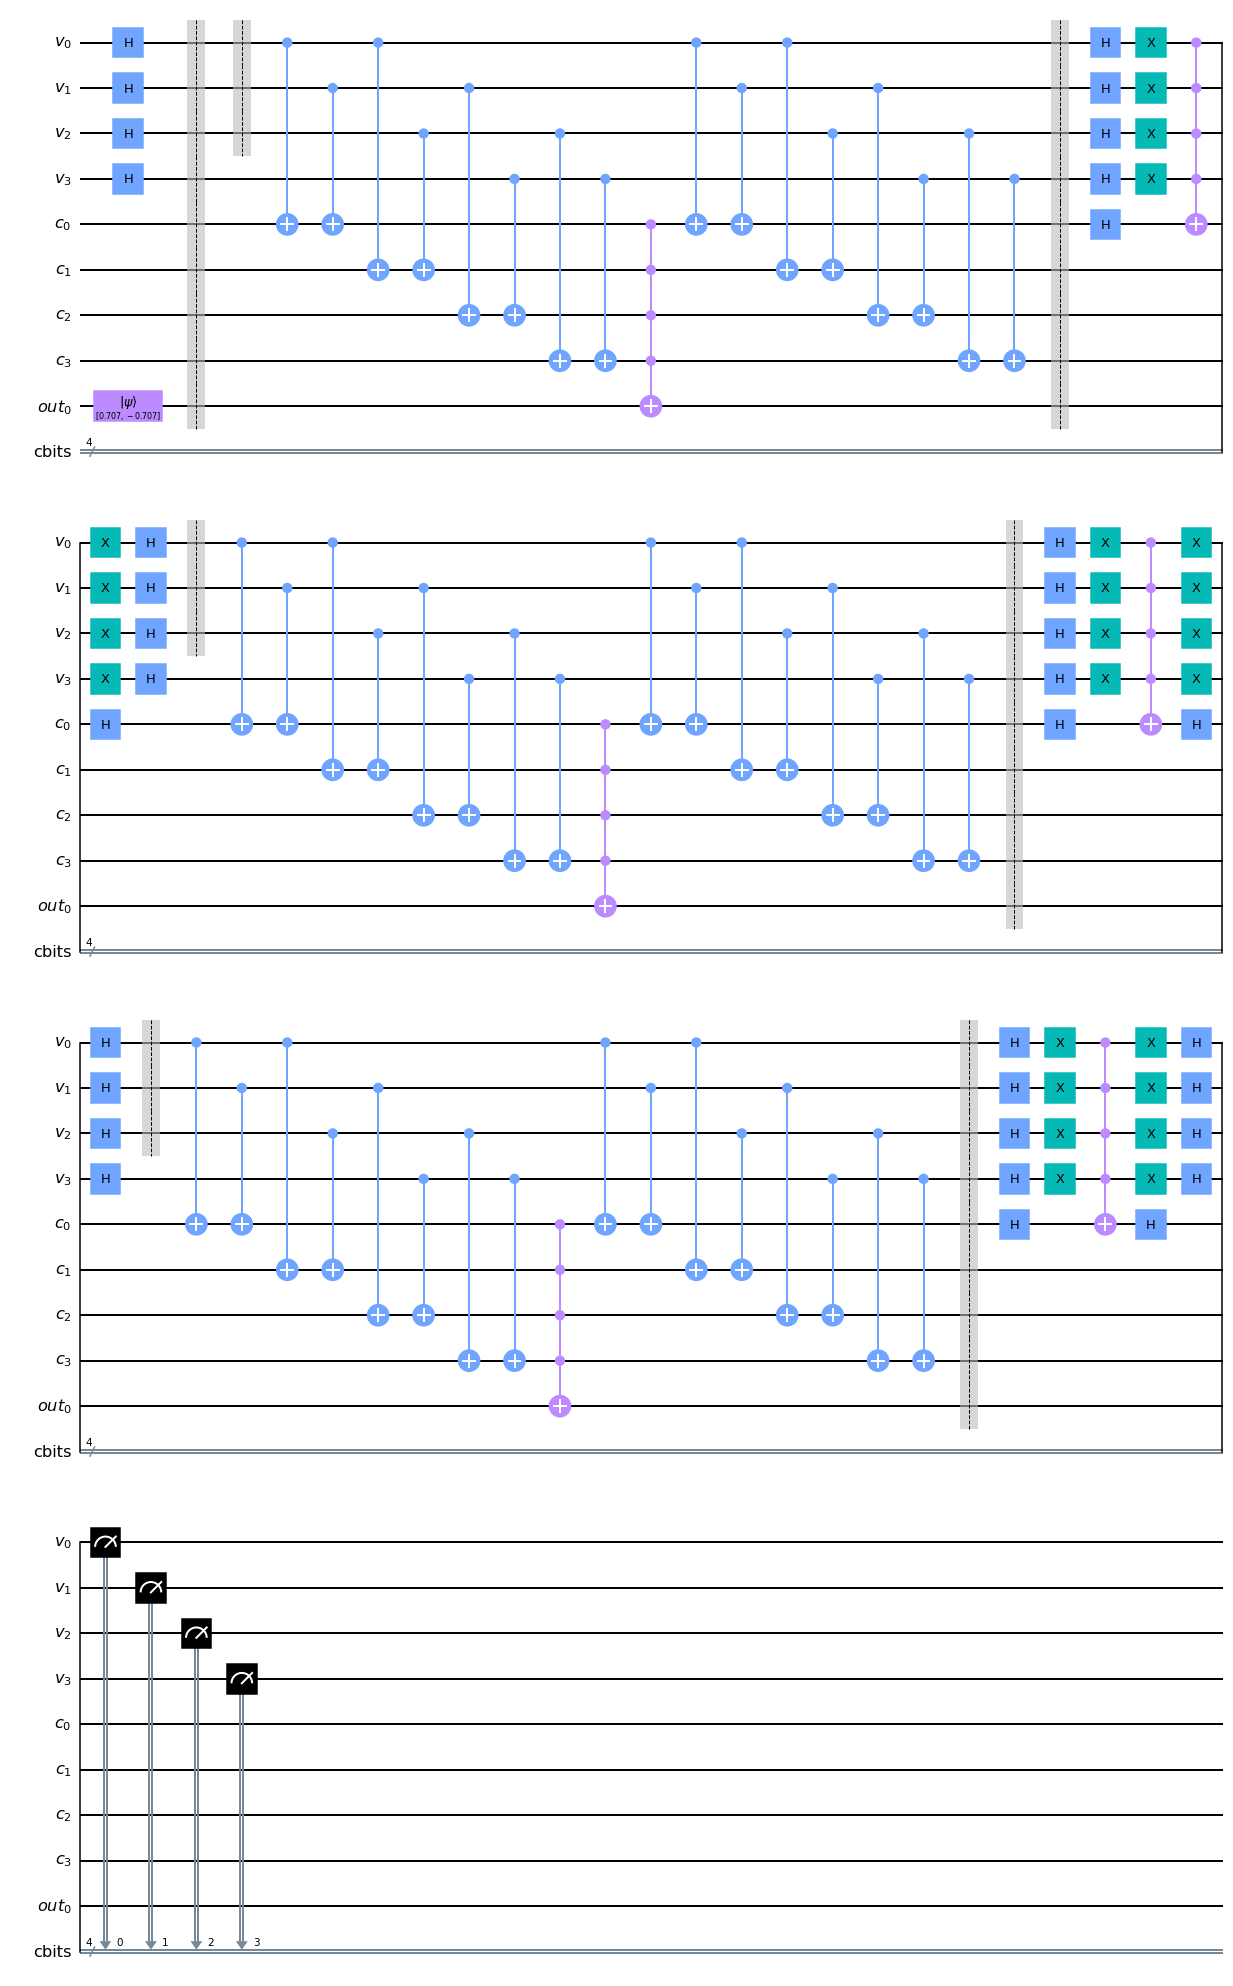

In [51]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

expression = '(~x1 & x2 & x3 & ~x4) ^ (x1 & ~x2 & ~x3 & x4)'
# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

for i in range(3):
    qc.barrier(list(range(3)))
    # Apply our oracle
    sudoku_oracle(qc, clause_list, clause_qubits)
    #qc.append(PhaseOracle(expression), list(range(4)))
    qc.barrier()  # for visual separation
    diffuser(qc)

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw(output='mpl')

In [44]:
# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_sim.run(qobj).result()
plot_histogram(result.get_counts())

NameError: name 'aer_sim' is not defined

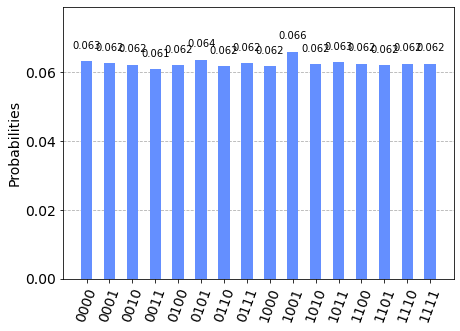

In [48]:
N = 100000  #Since we encounter random outputs due to the nature of the algorithm, we average the outcomes of N shots
simulator = Aer.get_backend('aer_simulator')
results = execute(qc, backend=simulator, shots=N).result()
counts = results.get_counts()
plot_histogram(counts)

array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

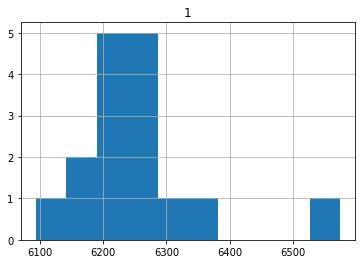

In [49]:
import pandas as pd
df = pd.DataFrame(counts.items())
df = df.sort_values(by=1, ascending=False)

df.hist()

       0     1
8   1001  6574
9   0101  6354
12  0000  6309
0   1011  6281
13  0111  6250
6   0001  6249
1   1111  6244
10  1100  6238
7   1110  6236
2   1010  6233
3   0010  6211
15  0100  6199
4   1101  6198
5   1000  6170
14  0110  6160
11  0011  6094
       0     1
8   1001  6574
9   0101  6354
12  0000  6309
0   1011  6281
13  0111  6250
6   0001  6249
1   1111  6244
10  1100  6238
7   1110  6236
2   1010  6233
3   0010  6211
15  0100  6199
4   1101  6198
5   1000  6170
14  0110  6160
11  0011  6094


array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

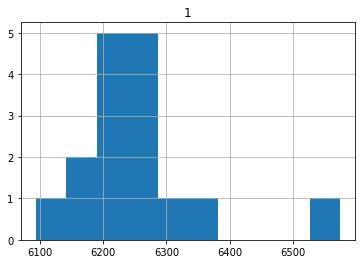

In [50]:
print(df)
df1 = df.copy(deep = True)
df1 = df1[df1[1] > N/1000]
print(df1)
df1.hist()